In [1]:
import sklearn
import numpy as np
import gzip
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import fetch_openml
# Cross validation will be used so test set is not always defined.
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)

Xtrain, ytrain = X[:60000], y[:60000]
Xtest, ytest = X[:60000], y[:60000]

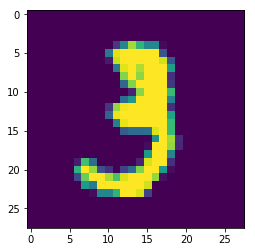

In [3]:
imageSize = 28
numImages = 70000

data = X
data = data.reshape(numImages, imageSize, imageSize, 1)

image = np.array(data[10]).squeeze()
plt.imshow(image)
plt.show()

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
parameters = {'kernel': ('linear', 'rbf', 'poly', 'sigmoid'), 'C': [1, 5, 10]}
svc = SVC(gamma = 'scale', cache_size = 1024, max_iter = 500, shrinking = True)
clf = GridSearchCV(estimator = svc, param_grid = parameters, n_jobs = 8)
clf.fit(X, y)

In [ ]:
for i,param in enumerate(clf.cv_results_['params']):
    print str(param) + str(': ') + str(1 - clf.cv_results_['mean_test_score'][i])

In [4]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
parameters = {'activation': ['identity', 'logistic'], 
              'hidden_layer_sizes': [50, 100, 150],
              'solver': ['lbfgs', 'sgd', 'adam'],
              'alpha': [1, 10]}
mlp  = MLPClassifier()
clf2 = GridSearchCV(estimator = mlp, param_grid = parameters, n_jobs=8)
clf2.fit(X, y)

/home/daniel/.conda/envs/csgrads1/lib/python2.7/site-packages/sklearn/model_selection/_split.py:2052: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/home/daniel/.conda/envs/csgrads1/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False),
       fit_params=None, iid='warn', n_jobs=8,
       param_grid={'alpha': [1, 10], 'activation': ['identity', 'logistic'], 'solver': ['lbfgs', 'sgd', 'adam'], 'hidden_layer_sizes': [50, 100, 150]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [12]:
for i,param in enumerate(clf2.cv_results_['params']):
    print str(param) + str(': ') + str(1 - clf2.cv_results_['mean_test_score'][i])

{'alpha': 1, 'activation': 'identity', 'solver': 'lbfgs', 'hidden_layer_sizes': 50}: 0.11004285714285711
{'alpha': 1, 'activation': 'identity', 'solver': 'sgd', 'hidden_layer_sizes': 50}: 0.9013857142857142
{'alpha': 1, 'activation': 'identity', 'solver': 'adam', 'hidden_layer_sizes': 50}: 0.09618571428571432
{'alpha': 1, 'activation': 'identity', 'solver': 'lbfgs', 'hidden_layer_sizes': 100}: 0.11761428571428567
{'alpha': 1, 'activation': 'identity', 'solver': 'sgd', 'hidden_layer_sizes': 100}: 0.9013857142857142
{'alpha': 1, 'activation': 'identity', 'solver': 'adam', 'hidden_layer_sizes': 100}: 0.10815714285714284
{'alpha': 1, 'activation': 'identity', 'solver': 'lbfgs', 'hidden_layer_sizes': 150}: 0.11704285714285712
{'alpha': 1, 'activation': 'identity', 'solver': 'sgd', 'hidden_layer_sizes': 150}: 0.9013857142857142
{'alpha': 1, 'activation': 'identity', 'solver': 'adam', 'hidden_layer_sizes': 150}: 0.10054285714285716
{'alpha': 10, 'activation': 'identity', 'solver': 'lbfgs', 'h

In [12]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
gbc = GradientBoostingClassifier(loss='deviance',criterion='mse', verbose=1, max_depth=5, max_features = 'sqrt')
gbc.fit(Xtrain, ytrain)

gbc2 = GradientBoostingClassifier(loss='deviance',criterion='mse', verbose=1, max_depth=4, max_features = 'sqrt')
gbc2.fit(Xtrain, ytrain)

gbc3 = GradientBoostingClassifier(loss='deviance',criterion='mse', verbose=1, max_depth=3, max_features = 'sqrt')
gbc3.fit(Xtrain, ytrain)

gbc4 = GradientBoostingClassifier(loss='deviance',criterion='mse', verbose=1, max_depth=2,
                                  max_features = 'sqrt')
gbc4.fit(Xtrain, ytrain)

gbc5 = GradientBoostingClassifier(loss='deviance',criterion='mse', verbose=1, max_depth=1,
                                  max_features = 'sqrt')
gbc5.fit(Xtrain, ytrain)

      Iter       Train Loss   Remaining Time 
         1      112970.7482            1.96m
         2       97079.5692            1.95m
         3       85491.7687            1.92m
         4       76592.8425            1.85m
         5       69139.7263            1.82m
         6       62394.7767            1.82m
         7       56924.4203            1.80m
         8       52116.4377            1.78m
         9       48025.8667            1.75m
        10       44579.7969            1.74m
        20       24740.1806            1.61m
        30       16555.2774            1.39m
        40       12261.8780            1.18m
        50        9636.3732           58.86s
        60        7861.6798           46.82s
        70        6514.5875           35.10s
        80        5506.5778           23.35s
        90        4688.2438           11.62s
       100        4026.1793            0.00s
      Iter       Train Loss   Remaining Time 
         1      116525.0236            1.45m
        

GradientBoostingClassifier(criterion='mse', init=None, learning_rate=0.1,
              loss='deviance', max_depth=1, max_features='sqrt',
              max_leaf_nodes=None, min_impurity_decrease=0.0,
              min_impurity_split=None, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=100, n_iter_no_change=None, presort='auto',
              random_state=None, subsample=1.0, tol=0.0001,
              validation_fraction=0.1, verbose=1, warm_start=False)

In [13]:
gbc7 = GradientBoostingClassifier(loss='deviance',criterion='friedman_mse', verbose=1, max_depth=5,
                                  max_features = 'sqrt')
gbc7.fit(Xtrain, ytrain)

gbc7 = GradientBoostingClassifier(loss='deviance',criterion='friedman_mse', verbose=1, max_depth=4,
                                  max_features = 'sqrt')
gbc7.fit(Xtrain, ytrain)

gbc8 = GradientBoostingClassifier(loss='deviance',criterion='friedman_mse', verbose=1, max_depth=3,
                                  max_features = 'sqrt')
gbc8.fit(Xtrain, ytrain)

gbc9 = GradientBoostingClassifier(loss='deviance',criterion='friedman_mse', verbose=1, max_depth=2,
                                  max_features = 'sqrt')
gbc9.fit(Xtrain, ytrain)

gbc10 = GradientBoostingClassifier(loss='deviance',criterion='friedman_mse', verbose=1, max_depth=5,
                                  learning_rate = 0.01, max_features = 'sqrt')
gbc10.fit(Xtrain, ytrain)

      Iter       Train Loss   Remaining Time 
         1      112655.1313            1.94m
         2       96983.7541            1.93m
         3       85836.5818            1.93m
         4       76276.4675            1.91m
         5       68780.9565            1.88m
         6       62323.4338            1.86m
         7       56733.8442            1.82m
         8       52084.8908            1.79m
         9       48239.3121            1.77m
        10       44734.2426            1.75m
        20       24529.4047            1.54m
        30       16616.2694            1.35m
        40       12361.9295            1.17m
        50        9708.4288           58.04s
        60        7830.4731           46.43s
        70        6566.4144           34.67s
        80        5563.9196           22.88s
        90        4777.2497           11.39s
       100        4127.4252            0.00s
      Iter       Train Loss   Remaining Time 
         1      118445.2436            1.31m
        

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.01, loss='deviance', max_depth=5,
              max_features='sqrt', max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=1, warm_start=False)

In [14]:
print 'mse with max depth 5 error rate: ' + str(gbc.score(Xtest,ytest))
print 'mse with max depth 4 error rate: ' + str(gbc2.score(Xtest,ytest))
print 'mse with max depth 3 error rate: ' + str(gbc3.score(Xtest,ytest))
print 'mae with max depth 2 error rate: ' + str(gbc4.score(Xtest,ytest))
print 'mae with max depth 1 error rate: ' + str(gbc5.score(Xtest,ytest))
print 'friedman_mse with max depth 5 error rate: ' + str(gb7.score(Xtest,ytest))
print 'friedman_mse with max depth 4 error rate: ' + str(gbc8.score(Xtest,ytest))
print 'friedman_mse with max depth 3 error rate: ' + str(gbc9.score(Xtest,ytest))
print 'friedman_mse with max depth 2 error rate: ' + str(gbc9.score(Xtest,ytest))
print 'friedman_mse with max depth 5 and learning rate 0.01 error rate: ' + str(gbc10.score(Xtest,ytest))

mse with max depth 5 error rate: 0.9889333333333333
mse with max depth 4 error rate: 0.9717
mse with max depth 3 error rate: 0.9501333333333334
mae with max depth 2 error rate: 0.9145166666666666
mae with max depth 1 error rate: 0.8560166666666666


NameError: name 'gb7' is not defined